# Proyek ML - FACE RECOGNITION UNTUK PENGENALAN IDENTITAS

## Permasalahan  yang dihadapi

### Penjelasan

## Alasan pemilihan data


### Penjelasan

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


## EDA

### EDA_age

                        filename  ID gender  age    x    y    w    h  \
0  ./data/at/Herdinand/001_0.pgm   1      M   20  318  186  196  196   
1  ./data/at/Herdinand/001_1.pgm   1      M   20  312  292   51   51   
2  ./data/at/Herdinand/001_2.pgm   1      M   20  312  292   51   51   
3  ./data/at/Herdinand/001_3.pgm   1      M   20  312  292   51   51   
4  ./data/at/Herdinand/001_4.pgm   1      M   20  273  231  132  132   

   timestamp  
0   1.025228  
1   1.284402  
2   1.313398  
3   1.331661  
4   1.377509  


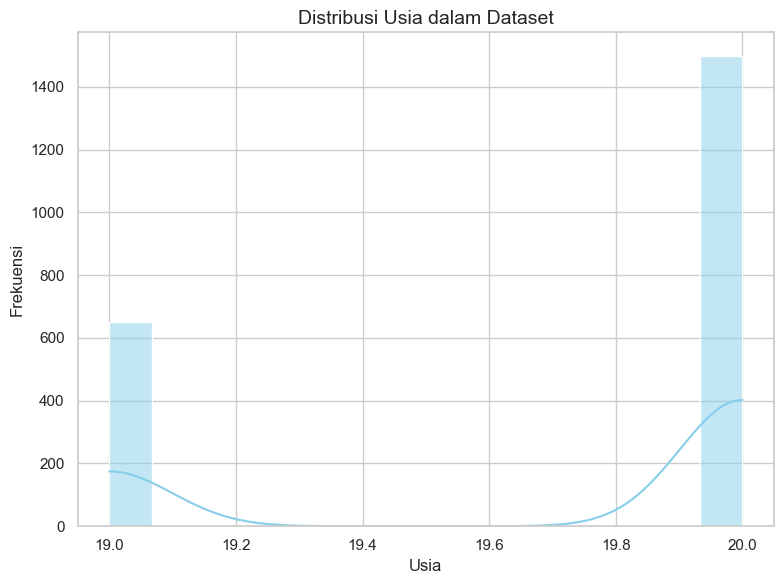

C:\Users\herdi\AppData\Local\Temp\ipykernel_15860\1590547196.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=df, palette='Set2')


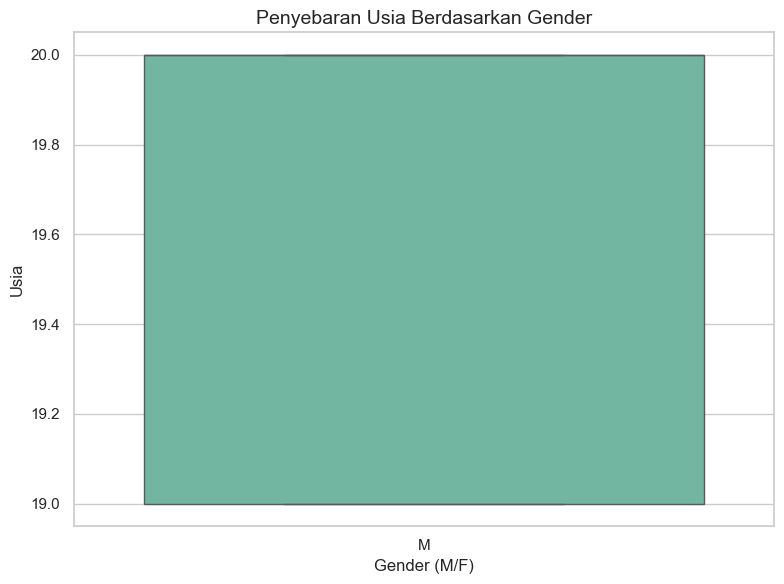

In [2]:
# Load data CSV
csv_path = './data/at/features.csv'  # Sesuaikan path kalau berbeda
df = pd.read_csv(csv_path)

# Cek beberapa data awal
print(df.head())

# Set style for better looking plots
sns.set(style="whitegrid")

# --- Visualisasi 1: Histogram Sebaran Usia ---
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='skyblue', bins=15)

plt.title('Distribusi Usia dalam Dataset', fontsize=14)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.tight_layout()
plt.show()

# --- Visualisasi 2: Boxplot Usia Berdasarkan Gender ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=df, palette='Set2')

plt.title('Penyebaran Usia Berdasarkan Gender', fontsize=14)
plt.xlabel('Gender (M/F)', fontsize=12)
plt.ylabel('Usia', fontsize=12)
plt.tight_layout()
plt.show()


### EDA_gender


                        filename  ID gender  age    x    y    w    h  \
0  ./data/at/Herdinand/001_0.pgm   1      M   20  318  186  196  196   
1  ./data/at/Herdinand/001_1.pgm   1      M   20  312  292   51   51   
2  ./data/at/Herdinand/001_2.pgm   1      M   20  312  292   51   51   
3  ./data/at/Herdinand/001_3.pgm   1      M   20  312  292   51   51   
4  ./data/at/Herdinand/001_4.pgm   1      M   20  273  231  132  132   

   timestamp  
0   1.025228  
1   1.284402  
2   1.313398  
3   1.331661  
4   1.377509  


C:\Users\herdi\AppData\Local\Temp\ipykernel_15860\643606730.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


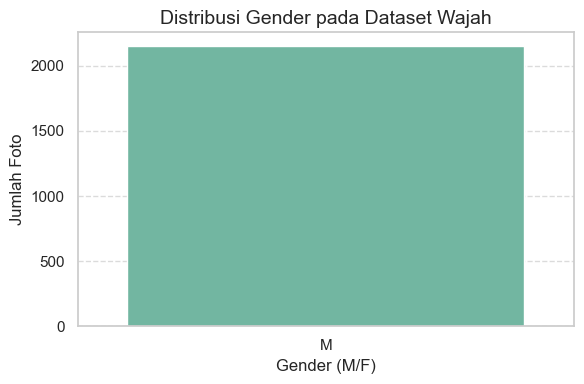

In [3]:
# Load data CSV
csv_path = './data/at/features.csv'  # Sesuaikan path kalau berbeda
df = pd.read_csv(csv_path)

# Cek beberapa data awal
print(df.head())

# Visualisasi distribusi gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='Set2')

plt.title('Distribusi Gender pada Dataset Wajah', fontsize=14)
plt.xlabel('Gender (M/F)', fontsize=12)
plt.ylabel('Jumlah Foto', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Penjelasan


## Data Preprocessing

### Resize image

In [6]:
# Fungsi untuk melakukan resize, normalisasi, dan simpan gambar hasil preprocessing
def preprocess_and_save_images(input_folder, output_folder, target_size=(200, 200)):
    images = []
    labels = []
    image_paths = []

    # Buat folder output jika belum ada
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop semua file gambar
    for filename in os.listdir(input_folder):
        if filename.endswith('.pgm'):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar dalam grayscale
            img = cv2.resize(img, target_size)  # Resize gambar

            # Normalisasi pixel
            img_normalized = img / 255.0

            images.append(img_normalized)
            image_paths.append(img_path)

            # Simpan gambar yang sudah diproses
            save_path = os.path.join(output_folder, filename)
            img_to_save = (img_normalized * 255).astype(np.uint8)  # Konversi kembali ke 0-255 untuk disimpan
            cv2.imwrite(save_path, img_to_save)  # Save image hasil normalisasi

    return np.array(images), image_paths

# Fungsi untuk preprocessing data CSV
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)

    # Encode label ID
    label_encoder = LabelEncoder()
    df['ID'] = label_encoder.fit_transform(df['ID'])

    # Extract features
    df_features = df[['age', 'gender', 'timestamp']].copy()

    # Encode gender
    df_features['gender'] = df_features['gender'].map({'M': 1, 'F': 0})

    return df_features, label_encoder

# Path input dan output
input_folder = './data/at/Herdinand'   # Folder asli
output_folder = './data/at/processed'  # Folder hasil preprocessing
csv_path = './data/at/features.csv'

# Jalankan preprocessing dan simpan hasil
images, image_paths = preprocess_and_save_images(input_folder, output_folder)

# Preprocess CSV untuk fitur tambahan
features, label_encoder = preprocess_csv(csv_path)

# Cek hasil
print(f"Jumlah gambar diproses dan disimpan: {len(images)}")
print(f"Beberapa fitur:\n{features.head()}")

Jumlah gambar diproses dan disimpan: 2150
Beberapa fitur:
   age  gender  timestamp
0   20       1   1.025228
1   20       1   1.284402
2   20       1   1.313398
3   20       1   1.331661
4   20       1   1.377509


### Histogram Equalization

In [7]:
def preprocess_images_with_histogram_equalization(image_folder, output_folder, target_size=(200, 200)):
    images1 = []
    labels1 = []
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(image_folder):
        if filename.endswith('.pgm'):
            img_path1 = os.path.join(image_folder, filename)
            img1 = cv2.imread(img_path1, cv2.IMREAD_GRAYSCALE)
            img1 = cv2.resize(img1, target_size)
            
            # Histogram Equalization untuk meningkatkan kontras
            img_eq = cv2.equalizeHist(img1)
            
            # Normalisasi pixel 0-1
            img_eq_normalized = img_eq / 255.0
            
            images1.append(img_eq_normalized)
            labels1.append(filename)

            # Simpan ke output folder
            save_path = os.path.join(output_folder, filename)
            img_to_save = (img_eq_normalized * 255).astype(np.uint8)
            cv2.imwrite(save_path, img_to_save)
    
    return np.array(images), labels

# Fungsi preprocessing CSV (bisa sama seperti sebelumnya)
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)

    # Encode label ID
    label_encoder = LabelEncoder()
    df['ID'] = label_encoder.fit_transform(df['ID'])
    
    # Encode gender
    df['gender'] = df['gender'].map({'M': 1, 'F': 0})
    
    # Isi missing value jika ada
    if df['age'].isnull().sum() > 0:
        df['age'] = df['age'].fillna(df['age'].median())
    if df['timestamp'].isnull().sum() > 0:
        df['timestamp'] = df['timestamp'].fillna(df['timestamp'].mean())

    return df

# Path ke folder dan CSV
image_folder = './data/at/Herdinand'
output_folder1 = './data/at/processed_hist_eq'  
csv_path = './data/at/features.csv'

# Preprocessing dengan histogram equalization
images1, labels1 = preprocess_images_with_histogram_equalization(image_folder, output_folder1)

# Preprocessing CSV
features1 = preprocess_csv(csv_path)

# Cek hasil
print(f"Jumlah gambar setelah histogram equalization: {len(images)}")
print(f"Beberapa data fitur: {features.head()}")


Jumlah gambar setelah histogram equalization: 2150
Beberapa data fitur:    age  gender  timestamp
0   20       1   1.025228
1   20       1   1.284402
2   20       1   1.313398
3   20       1   1.331661
4   20       1   1.377509


### Penjelasan

## Pelatihan dan Penyetelan Model

### Logistic Regression

In [9]:
# 1. Preprocessing gambar
images, _ = preprocess_and_save_images(input_folder, output_folder) #Bisa diganti dengan HE

# 2. Preprocessing CSV
csv_path = './data/at/features.csv'
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)
    le = LabelEncoder()
    df['ID'] = le.fit_transform(df['ID'])
    return df, le
features, label_encoder = preprocess_csv(csv_path)

# 3. Siapkan X dan y
X = images.reshape(len(images), -1)  # dari gambar (200x200) ke 40000 fitur
y = features['ID'].values            # ambil label ID user


# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Ukuran Train: {X_train.shape}, Ukuran Test: {X_test.shape}")

# ===================
# Model Training (Logistic Regression biasa)
# ===================
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Prediksi
y_pred = logreg.predict(X_test)

# Evaluasi
print("\n=== Evaluasi Logistic Regression Sebelum Tuning ===")
print(classification_report(y_test, y_pred))

# ===================
# Model Tuning (Grid Search untuk Logistic Regression)
# ===================
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga']
}

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n=== Hasil Grid Search ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# ===================
# Evaluasi Model Terbaik dari Grid Search
# ===================
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)

print("\n=== Evaluasi Logistic Regression Setelah Tuning ===")
print(classification_report(y_test, y_pred_best))

# ===================
# (Opsional) Visualisasi Confusion Matrix
# ===================
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Ukuran Train: (1720, 40000), Ukuran Test: (430, 40000)

=== Evaluasi Logistic Regression Sebelum Tuning ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       130

    accuracy                           1.00       430
   macro avg       1.00      1.00      1.00       430
weighted avg       1.00      1.00      1.00       430

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 

### Random Forest

In [8]:
# ===================================
# Load Data (ganti path sesuai dataset kamu)
# ===================================
# Misal fitur dan label sudah dari preprocessing sebelumnya
features = pd.read_csv('./data/at/features.csv')

# Contoh load images
images = np.load('./data/at/processed') 

# X dan y
X = images.reshape(len(images), -1)  # Flatten gambar 200x200 jadi 40000 fitur
y = features['ID'].values

# ===================================
# Split Data
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Ukuran Train: {X_train.shape}, Ukuran Test: {X_test.shape}")

# ===================================
# Training Model Random Forest
# ===================================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi Awal
print("\n=== Evaluasi Random Forest Sebelum Tuning ===")
print(classification_report(y_test, y_pred_rf))

# ===================================
# Tuning Model Random Forest (Grid Search)
# ===================================
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

cv = StratifiedKFold(n_splits=5)

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

print("\n=== Hasil Grid Search Random Forest ===")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_rf.best_score_}")

# ===================================
# Evaluasi Model Terbaik Setelah Tuning
# ===================================
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\n=== Evaluasi Random Forest Setelah Tuning ===")
print(classification_report(y_test, y_pred_best_rf))

# ===================================
# Visualisasi Confusion Matrix
# ===================================
cm_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Random Forest Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


PermissionError: [Errno 13] Permission denied: './data/at/processed'

### SVM

In [9]:
# ===================================
# Load Data (ganti path sesuai dataset kamu)
# ===================================
# Load fitur dan label
features = pd.read_csv('./data/at/features.csv')

# Load hasil preprocessing image
images = np.load('./data/at/processed')  # Harusnya ini hasil preprocessing

# X dan y
X = images.reshape(len(images), -1)  # Flatten gambar 200x200 jadi 40000 fitur
y = features['ID'].values

# ===================================
# Split Data
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Ukuran Train: {X_train.shape}, Ukuran Test: {X_test.shape}")

# ===================================
# Training Model SVM
# ===================================
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Prediksi
y_pred_svm = svm.predict(X_test)

# Evaluasi Awal
print("\n=== Evaluasi SVM Sebelum Tuning ===")
print(classification_report(y_test, y_pred_svm))

# ===================================
# Tuning Model SVM (Grid Search)
# ===================================
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

cv = StratifiedKFold(n_splits=5)

grid_search_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search_svm.fit(X_train, y_train)

print("\n=== Hasil Grid Search SVM ===")
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_svm.best_score_}")

# ===================================
# Evaluasi Model Terbaik Setelah Tuning
# ===================================
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

print("\n=== Evaluasi SVM Setelah Tuning ===")
print(classification_report(y_test, y_pred_best_svm))

# ===================================
# Visualisasi Confusion Matrix
# ===================================
cm_svm = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(10,8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix SVM Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

PermissionError: [Errno 13] Permission denied: './data/at/processed'

### KNN

In [ ]:
# ===================================
# Load Data
# ===================================
# Load fitur dan label
features = pd.read_csv('./data/at/features.csv')

# Load hasil preprocessing image
images = np.load('./data/at/processed')  # Pastikan ini hasil preprocessing

# X dan y
X = images.reshape(len(images), -1)  # Flatten 200x200 ke 40000 fitur
y = features['ID'].values

# ===================================
# Split Data
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Ukuran Train: {X_train.shape}, Ukuran Test: {X_test.shape}")

# ===================================
# Training Model KNN
# ===================================
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn.predict(X_test)

# Evaluasi Awal
print("\n=== Evaluasi KNN Sebelum Tuning ===")
print(classification_report(y_test, y_pred_knn))

# ===================================
# Tuning Model KNN (Grid Search)
# ===================================
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

cv = StratifiedKFold(n_splits=5)

grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train, y_train)

print("\n=== Hasil Grid Search KNN ===")
print(f"Best Parameters: {grid_search_knn.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_knn.best_score_}")

# ===================================
# Evaluasi Model Terbaik Setelah Tuning
# ===================================
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

print("\n=== Evaluasi KNN Setelah Tuning ===")
print(classification_report(y_test, y_pred_best_knn))

# ===================================
# Visualisasi Confusion Matrix
# ===================================
cm_knn = confusion_matrix(y_test, y_pred_best_knn)
plt.figure(figsize=(10,8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix KNN Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Penjelasan

## Pengukuran kinerja / evaluasi model

In [ ]:
# ===================================
# Load Data
# ===================================
# Load fitur dan label
features = pd.read_csv('./data/at/features.csv')

# Load hasil preprocessing image
images = np.load('./data/at/processed')  # Pastikan ini hasil preprocessing

# X dan y
X = images.reshape(len(images), -1)  # Flatten 200x200 ke 40000 fitur
y = features['ID'].values

# ===================================
# Split Data
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===================================
# Train Semua Model
# ===================================
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# ===================================
# Evaluasi Semua Model
# ===================================
# Logistic Regression Evaluation
print("\n=== Evaluasi Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))

# Random Forest Evaluation
print("\n=== Evaluasi Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# SVM Evaluation
print("\n=== Evaluasi SVM ===")
print(classification_report(y_test, y_pred_svm))

# KNN Evaluation
print("\n=== Evaluasi KNN ===")
print(classification_report(y_test, y_pred_knn))

# ===================================
# Visualisasi Confusion Matrix untuk Semua Model
# ===================================
# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10,8))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10,8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10,8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Penjelasan

## Visualisasi hasil

In [ ]:
# ===================================
# Load Data
# ===================================
# Load fitur dan label
features = pd.read_csv('./data/at/features.csv')

# Load hasil preprocessing image
images = np.load('./data/at/processed')  # Pastikan ini hasil preprocessing

# X dan y
X = images.reshape(len(images), -1)  # Flatten 200x200 ke 40000 fitur
y = features['ID'].values

# ===================================
# Split Data
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===================================
# Train Model (contoh dengan Random Forest)
# ===================================
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)  # Prediksi pada data pelatihan
y_pred_test = rf.predict(X_test)    # Prediksi pada data pengujian

# ===================================
# Visualisasi Hasil pada Data Pelatihan
# ===================================
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

# Ambil beberapa gambar pelatihan dan tampilkan prediksi
for i in np.arange(9):
    ax = axes[i]
    
    # Ambil gambar asli dari X_train dan reshape ke bentuk 200x200
    img = X_train[i].reshape(200, 200)
    
    # Tampilkan gambar
    ax.imshow(img, cmap='gray')
    
    # Prediksi ID menggunakan model
    predicted_label = y_pred_train[i]
    true_label = y_train[i]
    
    # Set judul dengan ID yang diprediksi vs yang sebenarnya
    ax.set_title(f"Pred: {predicted_label}\nTrue: {true_label}")
    
    ax.axis('off')

plt.tight_layout()
plt.show()

# ===================================
# Visualisasi Hasil pada Data Pengujian
# ===================================
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

# Ambil beberapa gambar uji dan tampilkan prediksi
for i in np.arange(9):
    ax = axes[i]
    
    # Ambil gambar asli dari X_test dan reshape ke bentuk 200x200
    img = X_test[i].reshape(200, 200)
    
    # Tampilkan gambar
    ax.imshow(img, cmap='gray')
    
    # Prediksi ID menggunakan model
    predicted_label = y_pred_test[i]
    true_label = y_test[i]
    
    # Set judul dengan ID yang diprediksi vs yang sebenarnya
    ax.set_title(f"Pred: {predicted_label}\nTrue: {true_label}")
    
    ax.axis('off')

plt.tight_layout()
plt.show()


### Penjelasan

## Kesimpulan

### Penjelasan